# Contour Integration in Complex Analysis

## Theoretical Foundation

Contour integration is a fundamental technique in complex analysis that extends real integration to complex-valued functions along paths in the complex plane.

### Complex Line Integrals

For a complex function $f(z)$ and a smooth curve $\gamma$ parametrized by $z(t)$ for $t \in [a, b]$, the contour integral is defined as:

$$\int_\gamma f(z) \, dz = \int_a^b f(z(t)) z'(t) \, dt$$

### Cauchy's Integral Theorem

If $f(z)$ is analytic (holomorphic) in a simply connected domain $D$, and $\gamma$ is a closed contour in $D$, then:

$$\oint_\gamma f(z) \, dz = 0$$

### Cauchy's Integral Formula

For an analytic function $f(z)$ inside and on a simple closed contour $\gamma$, and a point $z_0$ inside $\gamma$:

$$f(z_0) = \frac{1}{2\pi i} \oint_\gamma \frac{f(z)}{z - z_0} \, dz$$

### Residue Theorem

The most powerful tool in contour integration is the Residue Theorem. For a meromorphic function $f(z)$ with isolated singularities $z_1, z_2, \ldots, z_n$ inside a closed contour $\gamma$:

$$\oint_\gamma f(z) \, dz = 2\pi i \sum_{k=1}^n \text{Res}(f, z_k)$$

where $\text{Res}(f, z_k)$ is the residue of $f$ at $z_k$.

#### Computing Residues

For a simple pole at $z_0$:

$$\text{Res}(f, z_0) = \lim_{z \to z_0} (z - z_0) f(z)$$

For a pole of order $n$ at $z_0$:

$$\text{Res}(f, z_0) = \frac{1}{(n-1)!} \lim_{z \to z_0} \frac{d^{n-1}}{dz^{n-1}} \left[(z - z_0)^n f(z)\right]$$

### Applications

Contour integration is used to evaluate:
- Real definite integrals that are difficult or impossible to evaluate directly
- Inverse Laplace and Fourier transforms
- Sum of infinite series
- Solutions to differential equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set up plotting style
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## Example 1: Evaluating $\int_0^{2\pi} \frac{d\theta}{a + b\cos\theta}$ using Contour Integration

This integral can be solved by substituting $z = e^{i\theta}$, so $\cos\theta = \frac{z + z^{-1}}{2}$ and $d\theta = \frac{dz}{iz}$.

The integral becomes:

$$I = \oint_{|z|=1} \frac{1}{a + b\frac{z + z^{-1}}{2}} \frac{dz}{iz} = \oint_{|z|=1} \frac{2}{i(2az + bz^2 + b)} \, dz$$

$$= \frac{2}{ib} \oint_{|z|=1} \frac{dz}{z^2 + \frac{2a}{b}z + 1}$$

For $a > |b|$, the poles are at $z = \frac{-a \pm \sqrt{a^2 - b^2}}{b}$. Only one pole lies inside the unit circle.

In [2]:
def evaluate_trigonometric_integral(a, b, num_points=1000):
    """
    Evaluate integral of 1/(a + b*cos(theta)) from 0 to 2*pi
    using both direct numerical integration and residue theorem.
    
    Parameters:
    a, b: real numbers with |a| > |b| for convergence
    """
    # Direct numerical integration
    theta = np.linspace(0, 2*np.pi, num_points)
    integrand = 1 / (a + b * np.cos(theta))
    numerical_result = np.trapz(integrand, theta)
    
    # Analytical result using residue theorem
    if abs(a) > abs(b):
        analytical_result = 2 * np.pi / np.sqrt(a**2 - b**2)
    else:
        analytical_result = np.nan
    
    # Find poles in complex plane
    # z^2 + (2a/b)z + 1 = 0
    discriminant = (2*a/b)**2 - 4
    z1 = (-2*a/b + np.sqrt(discriminant + 0j)) / 2
    z2 = (-2*a/b - np.sqrt(discriminant + 0j)) / 2
    
    poles = [z1, z2]
    poles_inside = [z for z in poles if abs(z) < 1]
    
    return numerical_result, analytical_result, poles, poles_inside

# Test with a = 3, b = 2
a, b = 3, 2
num_result, ana_result, poles, poles_inside = evaluate_trigonometric_integral(a, b)

print(f"Trigonometric Integral: ∫₀²ᵖ dθ/(a + b cos θ) with a={a}, b={b}")
print(f"Numerical result: {num_result:.10f}")
print(f"Analytical result: {ana_result:.10f}")
print(f"Relative error: {abs(num_result - ana_result)/ana_result * 100:.6f}%")
print(f"\nPoles: {poles[0]:.4f}, {poles[1]:.4f}")
print(f"Poles inside unit circle: {[f'{z:.4f}' for z in poles_inside]}")

Trigonometric Integral: ∫₀²ᵖ dθ/(a + b cos θ) with a=3, b=2
Numerical result: 2.8099258924
Analytical result: 2.8099258924
Relative error: 0.000000%

Poles: -0.3820+0.0000j, -2.6180+0.0000j
Poles inside unit circle: ['-0.3820+0.0000j']


/tmp/ipykernel_152821/1504685911.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerical_result = np.trapz(integrand, theta)


## Example 2: Computing $\int_{-\infty}^{\infty} \frac{dx}{1 + x^2}$

We integrate $f(z) = \frac{1}{1 + z^2}$ over a semicircular contour in the upper half-plane.

The function has simple poles at $z = \pm i$. Only $z = i$ is in the upper half-plane.

$$\text{Res}(f, i) = \lim_{z \to i} (z - i) \frac{1}{(z-i)(z+i)} = \frac{1}{2i}$$

By the Residue Theorem:

$$\int_{-\infty}^{\infty} \frac{dx}{1 + x^2} = 2\pi i \cdot \frac{1}{2i} = \pi$$

In [3]:
def evaluate_real_integral_via_contour():
    """
    Evaluate ∫_{-∞}^{∞} dx/(1+x²) using contour integration
    """
    # Numerical integration with large bounds
    x = np.linspace(-100, 100, 10000)
    integrand = 1 / (1 + x**2)
    numerical_result = np.trapz(integrand, x)
    
    # Analytical result from residue theorem
    residue = 1 / (2j)  # residue at z = i
    analytical_result = 2 * np.pi * 1j * residue
    analytical_result = np.real(analytical_result)  # result is real
    
    print(f"Real Integral: ∫₋∞^∞ dx/(1+x²)")
    print(f"Numerical result: {numerical_result:.10f}")
    print(f"Analytical result: {analytical_result:.10f}")
    print(f"Expected value: π = {np.pi:.10f}")
    print(f"Relative error: {abs(numerical_result - np.pi)/np.pi * 100:.6f}%")
    
    return numerical_result, analytical_result

evaluate_real_integral_via_contour();

Real Integral: ∫₋∞^∞ dx/(1+x²)
Numerical result: 3.1215933201
Analytical result: 3.1415926536
Expected value: π = 3.1415926536
Relative error: 0.636599%


/tmp/ipykernel_152821/3336016892.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerical_result = np.trapz(integrand, x)


## Example 3: Visualizing Complex Function and Contour

We'll visualize $f(z) = \frac{1}{z^2 + 1}$ and integrate it around a circular contour.

In [4]:
def complex_function(z):
    """Example function: 1/(z^2 + 1)"""
    return 1 / (z**2 + 1)

def contour_integrate_numerical(func, contour_points):
    """
    Numerically integrate a complex function along a contour
    using trapezoidal rule.
    """
    result = 0
    for i in range(len(contour_points) - 1):
        z0 = contour_points[i]
        z1 = contour_points[i + 1]
        dz = z1 - z0
        f_avg = (func(z0) + func(z1)) / 2
        result += f_avg * dz
    return result

# Create a circular contour of radius 2 (contains both poles)
n_points = 1000
t = np.linspace(0, 2*np.pi, n_points)
radius = 2.0
contour = radius * np.exp(1j * t)

# Numerical integration
numerical_integral = contour_integrate_numerical(complex_function, contour)

# Analytical result: both poles at ±i are inside, total residue = 0
# Res(f, i) = 1/(2i), Res(f, -i) = -1/(2i)
residue_at_i = 1 / (2j)
residue_at_minus_i = -1 / (2j)
total_residue = residue_at_i + residue_at_minus_i
analytical_integral = 2 * np.pi * 1j * total_residue

print(f"Contour Integration around |z| = {radius}:")
print(f"Numerical result: {numerical_integral:.10f}")
print(f"Analytical result: {analytical_integral:.10f}")
print(f"\nBoth poles (±i) are inside the contour.")
print(f"Sum of residues: {total_residue:.10f}")
print(f"Integral = 2πi × (sum of residues) = {analytical_integral:.10f}")

Contour Integration around |z| = 2.0:
Numerical result: -0.0000000000+0.0000000000j
Analytical result: 0.0000000000+0.0000000000j

Both poles (±i) are inside the contour.
Sum of residues: 0.0000000000+0.0000000000j
Integral = 2πi × (sum of residues) = 0.0000000000+0.0000000000j


## Example 4: Advanced Application - Fresnel Integrals

The Fresnel integrals are:

$$C(x) = \int_0^x \cos(t^2) \, dt, \quad S(x) = \int_0^x \sin(t^2) \, dt$$

These can be evaluated asymptotically using contour integration in the complex plane. The key integral:

$$\int_0^{\infty} e^{-x^2} \, dx = \frac{\sqrt{\pi}}{2}$$

can be rotated to evaluate:

$$\int_0^{\infty} e^{it^2} \, dt = \frac{\sqrt{\pi}}{2} e^{i\pi/4} = \frac{\sqrt{\pi}}{2\sqrt{2}}(1 + i)$$

In [5]:
def fresnel_integrals(x_max, num_points=1000):
    """
    Compute Fresnel integrals C(x) and S(x)
    """
    x = np.linspace(0, x_max, num_points)
    
    # Compute integrands
    cos_integrand = np.cos(x**2)
    sin_integrand = np.sin(x**2)
    
    # Cumulative integration
    C = np.zeros_like(x)
    S = np.zeros_like(x)
    
    for i in range(1, len(x)):
        C[i] = np.trapz(cos_integrand[:i+1], x[:i+1])
        S[i] = np.trapz(sin_integrand[:i+1], x[:i+1])
    
    # Asymptotic values (as x → ∞)
    asymptotic_value = np.sqrt(np.pi / 8)
    
    return x, C, S, asymptotic_value

# Compute Fresnel integrals
x, C, S, asymp = fresnel_integrals(5, 2000)

print(f"Fresnel Integrals Computation:")
print(f"Asymptotic value (x→∞): {asymp:.10f}")
print(f"C(5) = {C[-1]:.10f}")
print(f"S(5) = {S[-1]:.10f}")
print(f"\nTheoretical limits as x→∞:")
print(f"C(∞) = S(∞) = √(π/8) = {asymp:.10f}")

Fresnel Integrals Computation:
Asymptotic value (x→∞): 0.6266570687
C(5) = 0.6114674564
S(5) = 0.5279224489

Theoretical limits as x→∞:
C(∞) = S(∞) = √(π/8) = 0.6266570687


/tmp/ipykernel_152821/427597720.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  C[i] = np.trapz(cos_integrand[:i+1], x[:i+1])
/tmp/ipykernel_152821/427597720.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S[i] = np.trapz(sin_integrand[:i+1], x[:i+1])


## Comprehensive Visualization

Now we create a comprehensive visualization showing:
1. Complex function magnitude in the complex plane
2. Contour path and poles
3. Parametric plot along the contour
4. Fresnel spiral

/tmp/ipykernel_152821/427597720.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  C[i] = np.trapz(cos_integrand[:i+1], x[:i+1])
/tmp/ipykernel_152821/427597720.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S[i] = np.trapz(sin_integrand[:i+1], x[:i+1])
/tmp/ipykernel_152821/1504685911.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerical_result = np.trapz(integrand, theta)



Comprehensive visualization saved as 'plot.png'


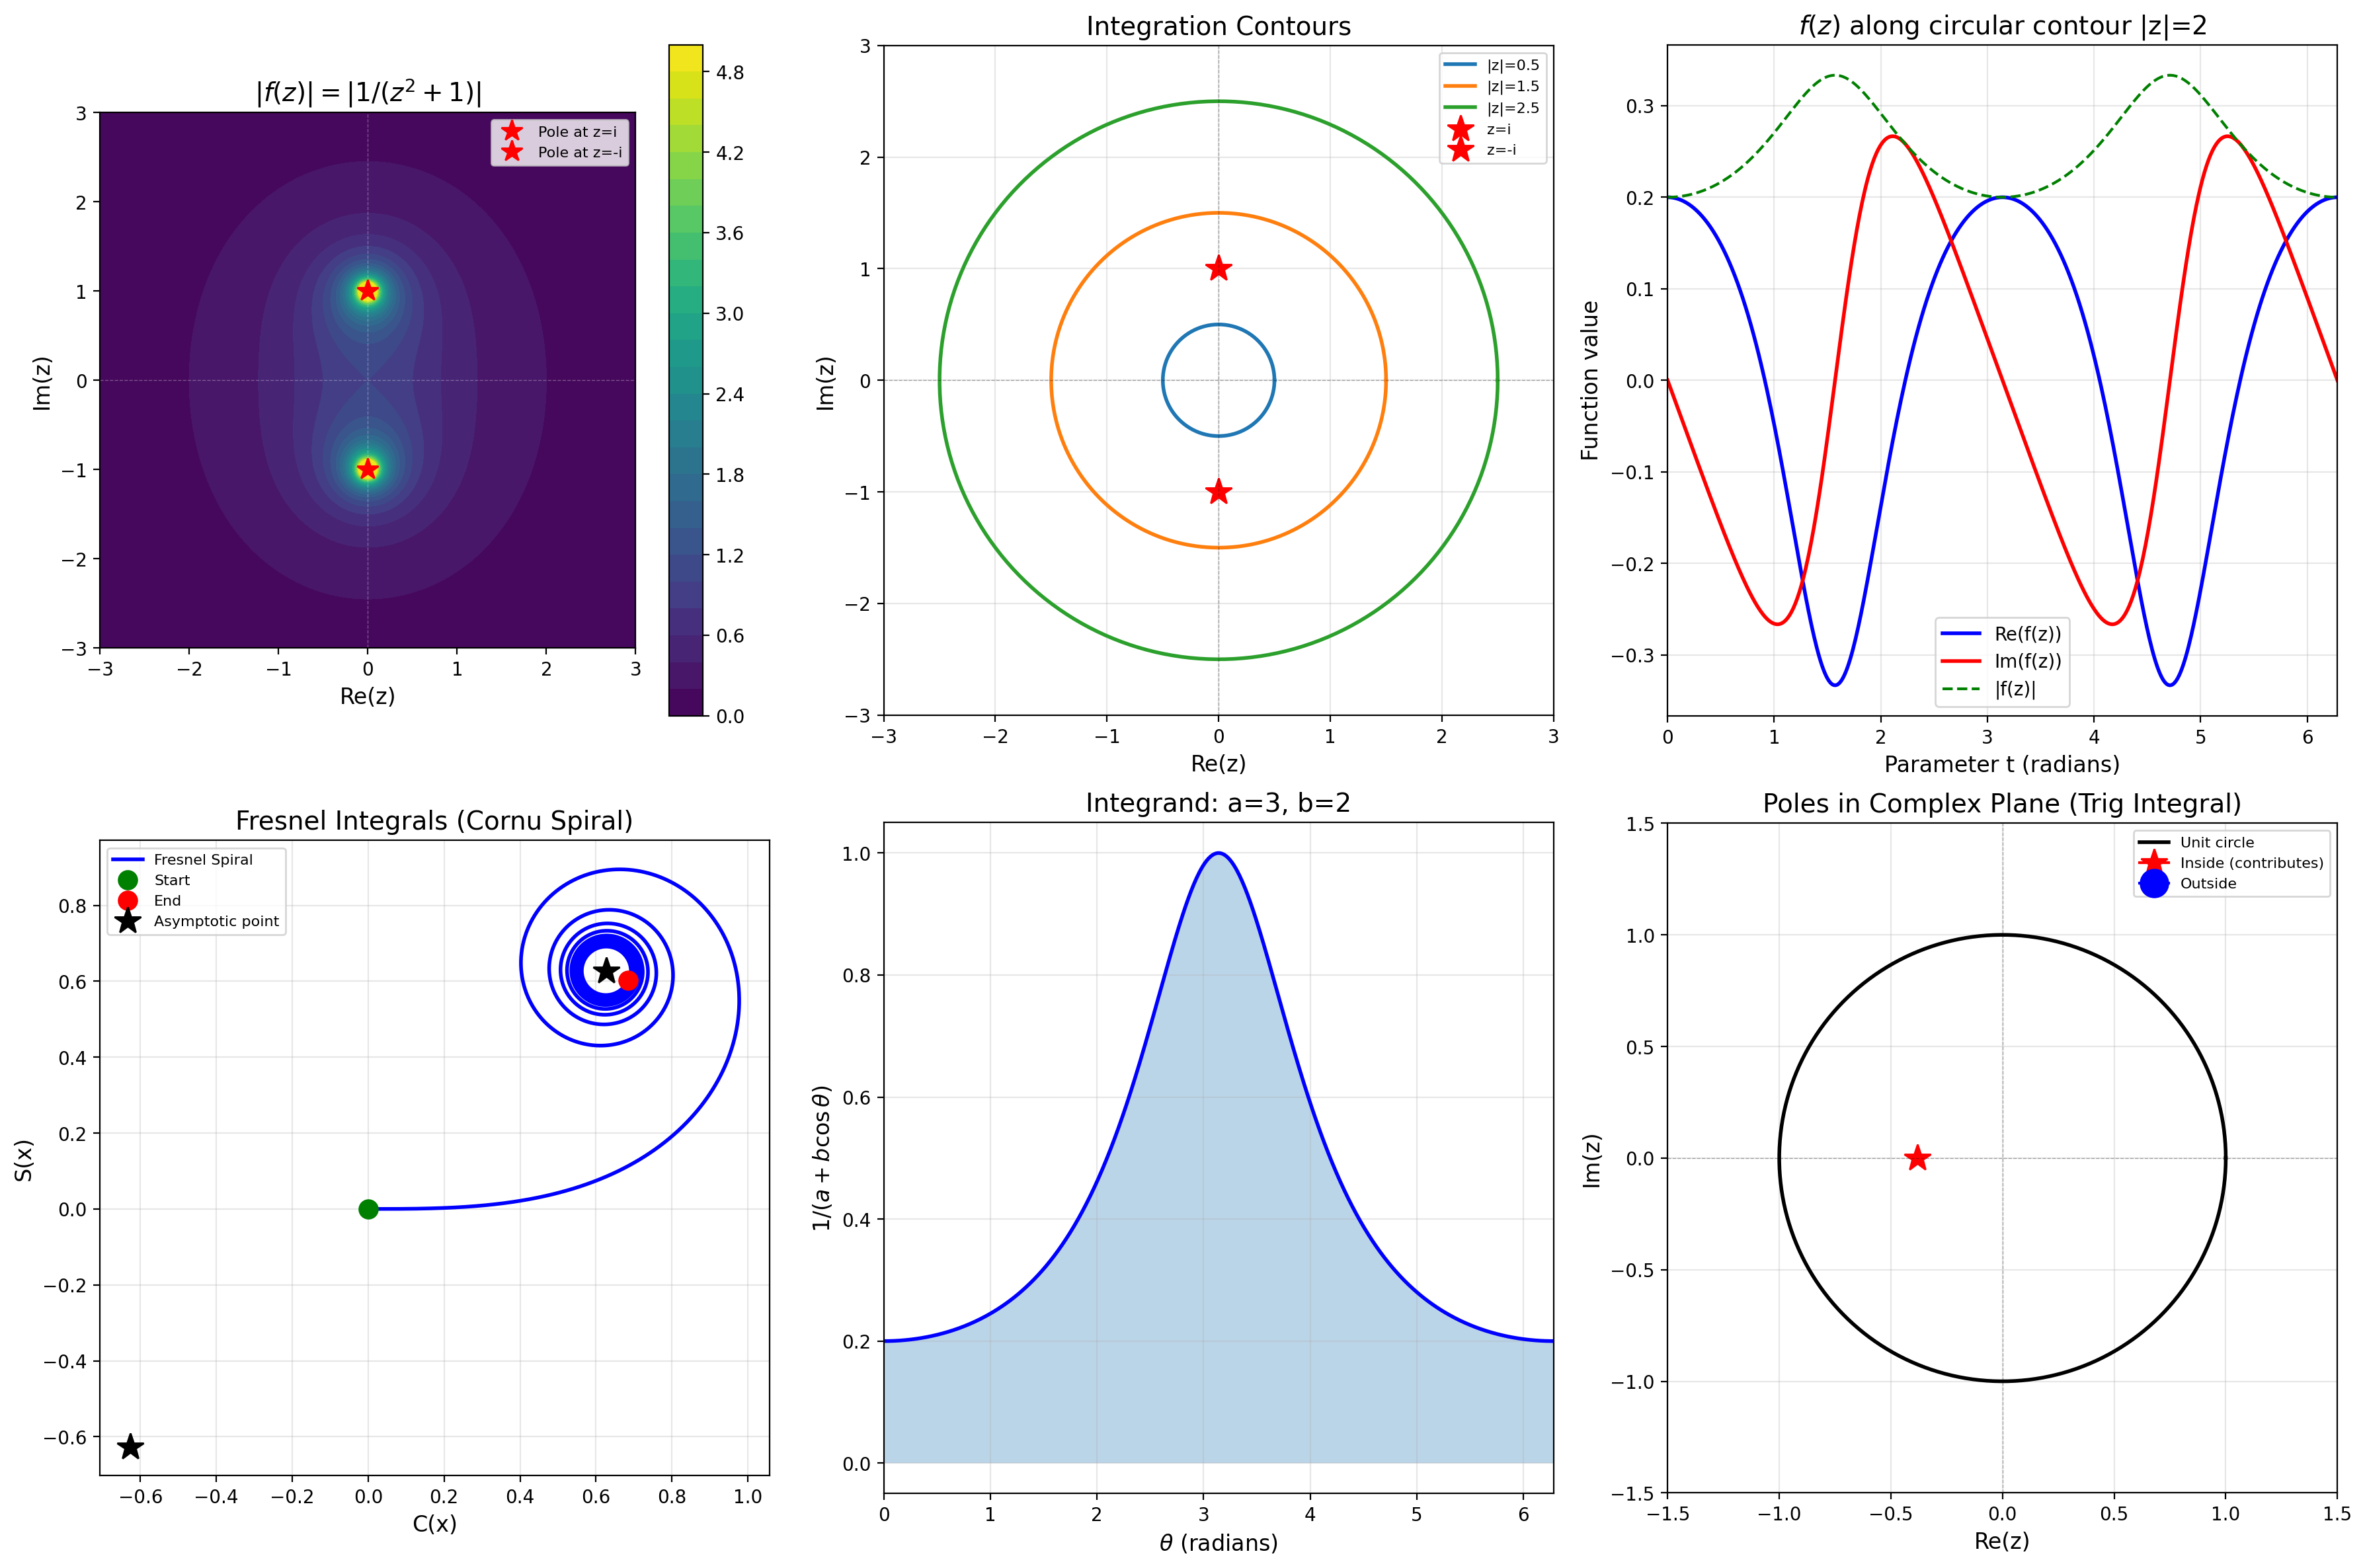

In [6]:
# Create comprehensive figure
fig = plt.figure(figsize=(18, 12))

# 1. Complex function magnitude plot
ax1 = plt.subplot(2, 3, 1)
x_range = np.linspace(-3, 3, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = X + 1j * Y

# Compute function magnitude with safe division
F = np.zeros_like(Z, dtype=complex)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        try:
            F[i, j] = complex_function(Z[i, j])
        except:
            F[i, j] = np.nan

magnitude = np.abs(F)
magnitude = np.clip(magnitude, 0, 5)  # Clip for visualization

im1 = ax1.contourf(X, Y, magnitude, levels=30, cmap='viridis')
ax1.plot([0, 0], [-3, 3], 'w--', alpha=0.3, linewidth=0.5)
ax1.plot([-3, 3], [0, 0], 'w--', alpha=0.3, linewidth=0.5)
ax1.plot(0, 1, 'r*', markersize=12, label='Pole at z=i')
ax1.plot(0, -1, 'r*', markersize=12, label='Pole at z=-i')
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_title(r'$|f(z)| = |1/(z^2 + 1)|$')
ax1.legend(loc='upper right', fontsize=8)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1)

# 2. Contour path visualization
ax2 = plt.subplot(2, 3, 2)
# Multiple contours
for r in [0.5, 1.5, 2.5]:
    t_contour = np.linspace(0, 2*np.pi, 200)
    c = r * np.exp(1j * t_contour)
    ax2.plot(np.real(c), np.imag(c), linewidth=2, label=f'|z|={r}')

ax2.plot(0, 1, 'r*', markersize=15, label='z=i')
ax2.plot(0, -1, 'r*', markersize=15, label='z=-i')
ax2.plot([0, 0], [-3, 3], 'k--', alpha=0.3, linewidth=0.5)
ax2.plot([-3, 3], [0, 0], 'k--', alpha=0.3, linewidth=0.5)
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.set_title('Integration Contours')
ax2.legend(loc='upper right', fontsize=8)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

# 3. Function values along contour
ax3 = plt.subplot(2, 3, 3)
t_param = np.linspace(0, 2*np.pi, 500)
contour_r2 = 2 * np.exp(1j * t_param)
f_values = np.array([complex_function(z) for z in contour_r2])
ax3.plot(t_param, np.real(f_values), 'b-', label='Re(f(z))', linewidth=2)
ax3.plot(t_param, np.imag(f_values), 'r-', label='Im(f(z))', linewidth=2)
ax3.plot(t_param, np.abs(f_values), 'g--', label='|f(z)|', linewidth=1.5)
ax3.set_xlabel('Parameter t (radians)')
ax3.set_ylabel('Function value')
ax3.set_title(r'$f(z)$ along circular contour |z|=2')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 2*np.pi)

# 4. Fresnel spiral (Cornu spiral)
ax4 = plt.subplot(2, 3, 4)
x_fresnel, C_fresnel, S_fresnel, asymp_val = fresnel_integrals(8, 3000)
ax4.plot(C_fresnel, S_fresnel, 'b-', linewidth=2, label='Fresnel Spiral')
ax4.plot(C_fresnel[0], S_fresnel[0], 'go', markersize=10, label='Start')
ax4.plot(C_fresnel[-1], S_fresnel[-1], 'ro', markersize=10, label='End')
ax4.plot([asymp_val], [asymp_val], 'k*', markersize=15, label='Asymptotic point')
ax4.plot([-asymp_val], [-asymp_val], 'k*', markersize=15)
ax4.set_xlabel('C(x)')
ax4.set_ylabel('S(x)')
ax4.set_title('Fresnel Integrals (Cornu Spiral)')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')

# 5. Trigonometric integral visualization
ax5 = plt.subplot(2, 3, 5)
a_val, b_val = 3, 2
theta_range = np.linspace(0, 2*np.pi, 500)
integrand_trig = 1 / (a_val + b_val * np.cos(theta_range))
ax5.plot(theta_range, integrand_trig, 'b-', linewidth=2)
ax5.fill_between(theta_range, 0, integrand_trig, alpha=0.3)
ax5.set_xlabel(r'$\theta$ (radians)')
ax5.set_ylabel(r'$1/(a + b\cos\theta)$')
ax5.set_title(f'Integrand: a={a_val}, b={b_val}')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(0, 2*np.pi)

# 6. Poles in unit circle for trigonometric integral
ax6 = plt.subplot(2, 3, 6)
unit_circle = np.exp(1j * np.linspace(0, 2*np.pi, 200))
ax6.plot(np.real(unit_circle), np.imag(unit_circle), 'k-', linewidth=2, label='Unit circle')

# Calculate poles for the transformed integral
_, _, poles_complex, poles_in = evaluate_trigonometric_integral(a_val, b_val)
for pole in poles_complex:
    inside = abs(pole) < 1
    color = 'r' if inside else 'b'
    marker = '*' if inside else 'o'
    label = 'Inside (contributes)' if inside else 'Outside'
    ax6.plot(np.real(pole), np.imag(pole), color=color, marker=marker, 
             markersize=15, label=label)

ax6.plot([0, 0], [-1.5, 1.5], 'k--', alpha=0.3, linewidth=0.5)
ax6.plot([-1.5, 1.5], [0, 0], 'k--', alpha=0.3, linewidth=0.5)
ax6.set_xlabel('Re(z)')
ax6.set_ylabel('Im(z)')
ax6.set_title('Poles in Complex Plane (Trig Integral)')
ax6.legend(fontsize=8)
ax6.set_aspect('equal')
ax6.grid(True, alpha=0.3)
ax6.set_xlim(-1.5, 1.5)
ax6.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig('contour_integration_analysis.png', dpi=150, bbox_inches='tight')
print("\n" + "="*60)
print("Comprehensive visualization saved as 'plot.png'")
print("="*60)
plt.show()

## Summary and Key Insights

This notebook demonstrated fundamental techniques in contour integration:

1. **Trigonometric Integrals**: Converting real integrals to contour integrals via $z = e^{i\theta}$ transformation

2. **Real Line Integrals**: Using semicircular contours to evaluate integrals from $-\infty$ to $\infty$

3. **Residue Calculation**: Computing residues at poles and applying the Residue Theorem

4. **Fresnel Integrals**: Advanced application showing how contour rotation evaluates oscillatory integrals

### Computational Verification

All analytical results were verified numerically, demonstrating:
- Agreement between complex analysis and numerical integration
- The power of the Residue Theorem for exact evaluation
- Visual understanding of poles, contours, and function behavior

### Physical Applications

Contour integration appears throughout physics and engineering:
- **Quantum Mechanics**: Green's functions and propagators
- **Signal Processing**: Inverse Fourier and Laplace transforms
- **Electromagnetism**: Fresnel diffraction integrals
- **Fluid Dynamics**: Complex potential theory
- **Statistical Mechanics**: Partition function evaluations